In [1]:
import numpy as np
#open("q
data=np.genfromtxt("/home/limu/Documents/Space/QUVIK/Work/feasibility/galex_catalog.txt",skip_header=42,usecols=range(1,18))

In [30]:
sources=np.genfromtxt("/home/limu/Documents/Space/QUVIK/Work/feasibility/galex_sources.txt",skip_header=55,usecols=range(1,13))
snames=[a.split(' ')[0] for a in open("/home/limu/Documents/Space/QUVIK/Work/feasibility/galex_sources.txt").readlines()[55:]]

- FUV Band eff. 152 nm
- NUV Band eff. 226 nm

Text(0.5, 0, 'distance [Mpc]')

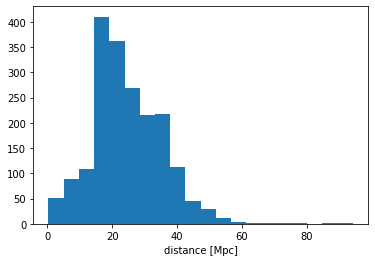

In [35]:
pl.hist(sources[:,3],20)
pl.xlabel('distance [Mpc]')

In [34]:
len(sources)

1931

In [5]:
sel=data[:,0]==12
sum(sel)

1929

In [3]:
from astroquery.vizier import Vizier
from astroquery.mast import Observations
obs_table = Observations.query_region("%.5f %.5f"%tuple(sources[0][:2]))
print(obs_table[:10])

intentType obs_collection provenance_name ... srcDen  obsid       distance    
---------- -------------- --------------- ... ------ ------- -----------------
   science    SPITZER_SHA    SSC Pipeline ...    nan 1650015               0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1650015               0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1641350               0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1641350               0.0
   science            PS1             3PI ... 5885.0 2236113               0.0
   science            PS1             3PI ... 5885.0 2236114               0.0
   science            PS1             3PI ... 5885.0 2236115               0.0
   science            PS1             3PI ... 5885.0 2236116               0.0
   science            PS1             3PI ... 5885.0 2236117               0.0
   science            PS1             3PI ... 5885.0 2236063 4.996502168242004


In [7]:
mine=[oo for oo in obs_table if oo['obs_collection']=='GALEX']
#data_products = Observations.get_product_list(mine[1])

mine[1]

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str12,str5,str3,str5,str16,str17,str1,str31,float64,float64,str5,str13,int64,float64,float64,float64,float64,float64,str57,float64,str13,str3,int64,str122,str132,str137,str6,bool,float64,str7,float64
science,GALEX,MIS,GALEX,MIS,NUV,UV,MISDR2_28657_0750,--,2472513716323614720,0.5527482189276043,15.186919972358,image,--,2,53243.8337037037,53243.85327546297,1691.05,169300000000.0,300700000000.0,--,55274.94157395,--,MIS,--,CIRCLE ICRS 0.55274822 15.18691997 0.625,http://galex.stsci.edu/data/GR6/pipe/01-vsn/04737-MISDR2_28657_0750/d/01-main/0001-img/07-try/qa/MISDR2_28657_0750-xd-int_2color.jpg,http://galex.stsci.edu/data/GR6/pipe/01-vsn/04737-MISDR2_28657_0750/d/01-main/0001-img/07-try/MISDR2_28657_0750-nd-exp.fits.gz,PUBLIC,--,5885.0,1083,0.0


In [71]:
Observations.enable_cloud_dataset(provider='AWS')
Observations.get_cloud_uris(data_products)

ModuleNotFoundError: No module named 'boto3'

### overall table

In [2]:
maj_ax=data[:,0]
begline=np.where(maj_ax[1:]<maj_ax[:-1])[0]+1
begline=np.r_[0,begline]

Text(0, 0.5, 'no of observations')

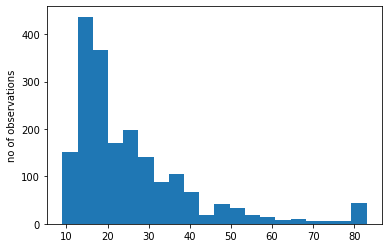

In [3]:
from matplotlib import pyplot as pl
%matplotlib inline
pl.hist(-begline[:-1]+begline[1:],20)
pl.ylabel("no of observations")

In [26]:
data[begline+2,0][:10]

array([24., 18., 18., 18., 18., 18., 18., 18., 18., 18.])

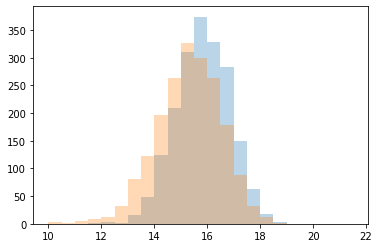

In [27]:
data[231:251,0]
pl.hist(data[begline+7,8],np.r_[10:22:0.5],alpha=0.3);
pl.hist(data[begline[1:]-1,8],np.r_[10:22:0.5],alpha=0.3);

19.440932038596042

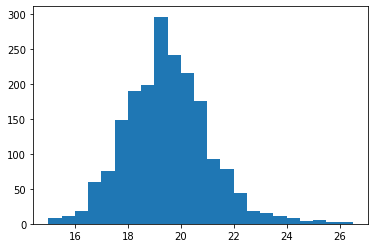

In [46]:
dist=sources[:,3]

magcor_nuv=data[begline[1:]-1,8]+np.log10(150/dist[1:])*5
pl.hist(magcor_nuv,np.r_[15:27:0.5]);
np.median(magcor_nuv)

In [47]:
np.median(dist)

23.1

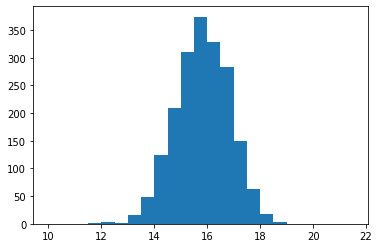

In [23]:
pl.hist(data[begline+7,8],np.r_[10:22:0.5]);

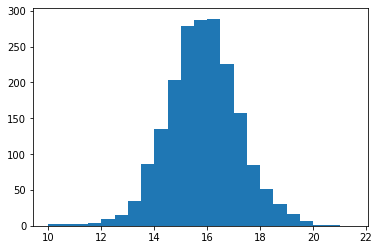

In [18]:
pl.hist(data[begline-1,4],np.r_[10:22:0.5]);

In [4]:
len(begline)

1931

(0.9, 1.2)

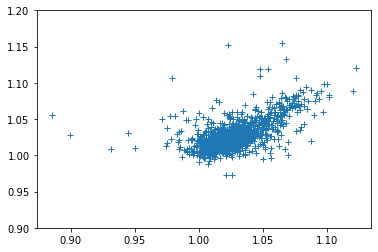

In [19]:
#pl.hist(data[begline[1:]-1,1],20)
sel=(data[begline[1:]+7,6]<50)*(data[begline[1:]+7,3]<2)
RAT2=data[begline[1:]+7,2][sel]/data[begline[1:]+7,6][sel]
RAT1=data[begline[1:]+5,2][sel]/data[begline[1:]+5,6][sel]
#pl.plot(data[begline[1:]-1,1][sel],data[begline[1:]+7,6][sel],'+')
pl.plot(RAT2,RAT1,'+')
pl.ylim(0.9,1.2)

In [20]:
data[begline[1:]+5,2][sel]

array([24.474, 24.499, 24.715, ..., 26.773, 24.717, 26.335])

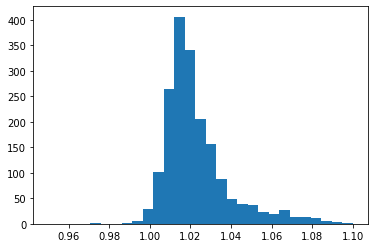

In [23]:
pl.hist(RAT1,np.r_[.95:1.1:30j]); #FUV mag to 

Text(0, 0.5, 'FUV/NUV color')

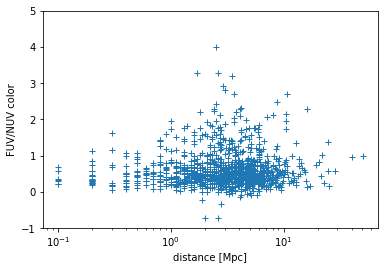

In [28]:
sel2=sel*(sources[1:,4]>0)
#RAT1=data[begline[1:]+5,4][sel]/data[begline[1:]+5,6][sel]
dist=sources[1:,4][sel2] #v Mpc
DIF1=data[begline[1:]+5,2][sel2]-data[begline[1:]+5,6][sel2]
pl.semilogx(dist,DIF1,'+')
pl.ylim(-1,5)
pl.xlabel("distance [Mpc]")
pl.ylabel("FUV/NUV color")
#pl.hist(sources[1:,4][sel2],30);

Text(0.5, 0, '(largest) maj. ax [arcsec]')

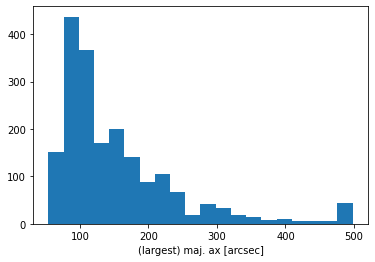

In [56]:
pl.hist(maj_ax[begline[1:]-1],20)
pl.xlabel("(largest) maj. ax [arcsec]")

Text(0.5, 0, 'major ax [arcsec]')

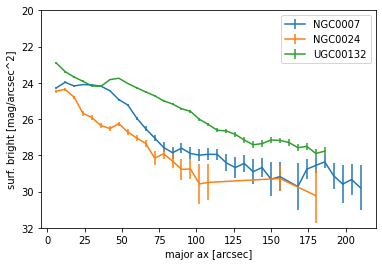

In [29]:
for j in [3,5,8]:
    mag,emag=data[begline[j]:begline[j+1],6:8].T
    msel=(mag<99)*(emag<7)
    pl.errorbar(maj_ax[begline[j]:begline[j+1]][msel],mag[msel],emag[msel])
pl.ylim(32,20)
pl.legend([snames[j] for j in [3,5,8]])
pl.ylabel("surf. bright [mag/arcsec^2]")
pl.xlabel("major ax [arcsec]")

Text(0.5, 0, 'major ax [arcsec]')

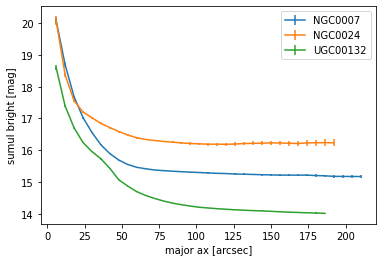

In [30]:
#from astropy import cosmology
for j in [3,5,8]:
    mag,emag=data[begline[j]:begline[j+1],8:10].T
    msel=(mag<99)*(emag<7)
    pl.errorbar(maj_ax[begline[j]:begline[j+1]][msel],mag[msel],emag[msel])
#pl.ylim(32,20)
pl.legend([snames[j] for j in [3,5,8]])
pl.ylabel("sumul bright [mag]")
pl.xlabel("major ax [arcsec]")

In [31]:
.04*600

24.0

In [32]:
mfuv,mnuv,mcol=data[1][2:14].reshape(3,4)
mcol,mfuv-mnuv

(array([ 0.288,  0.102, 24.   , 21.958]), array([0.288, 0.043, 0.285, 0.022]))

In [35]:
j=8
mag,emag=data[begline[j]:begline[j+1],6:8].T
cmag,ecmag=data[begline[j]:begline[j+1],8:10].T
data[begline[j]:begline[j+1],0].T

array([  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,  66.,
        72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126., 132.,
       138., 144., 150., 156., 162., 168., 174., 180., 186.])

In [36]:
cmag,mag

(array([18.598, 17.392, 16.707, 16.243, 15.957, 15.729, 15.43 , 15.068,
        14.872, 14.696, 14.577, 14.482, 14.402, 14.336, 14.286, 14.242,
        14.206, 14.182, 14.16 , 14.143, 14.125, 14.112, 14.1  , 14.09 ,
        14.078, 14.063, 14.052, 14.042, 14.032, 14.023, 14.015]),
 array([22.901, 23.38 , 23.68 , 23.917, 24.173, 24.191, 23.824, 23.746,
        24.036, 24.274, 24.502, 24.714, 24.99 , 25.168, 25.429, 25.573,
        26.012, 26.297, 26.618, 26.652, 26.84 , 27.15 , 27.419, 27.353,
        27.155, 27.178, 27.291, 27.577, 27.509, 27.897, 27.771]))

In [37]:
elipt=np.sqrt(1-data[begline[j],1]**2)
surf=3.1415*maj_ax[begline[j]:begline[j+1]]**2*elipt
dsurf=surf[1:]-surf[:-1]

In [38]:
dflx=10**(0.4*(10-mag[:-1]))*dsurf
10-np.log10(np.cumsum(dflx))/0.4-cmag[:-1]

array([-1.75002079, -1.33506497, -1.12553631, -1.00058794, -0.96462388,
       -0.96939039, -0.96538409, -0.87962485, -0.87451269, -0.84374255,
       -0.83917638, -0.83718975, -0.82939651, -0.82528561, -0.82470946,
       -0.82484461, -0.81903642, -0.81898065, -0.81539665, -0.81684434,
       -0.81485964, -0.81429307, -0.81232499, -0.81333212, -0.81492549,
       -0.81358335, -0.81520205, -0.81514728, -0.81600233, -0.81478596])

12 : 1929
24 : 1930
36 : 1930


Text(0.5, 0, 'surf. mag. NUV')

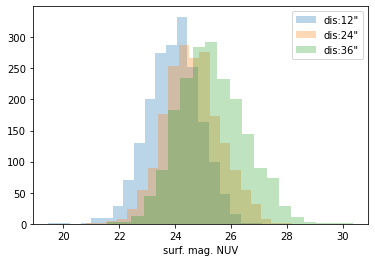

In [39]:
for dis in 12,24,36:
    linsel=maj_ax==dis
    magx,emagx=data[linsel,6:8].T
    print(dis,':',sum(linsel))
    pl.hist(magx,20,alpha=0.30,label='dis:%i"'%dis);
pl.legend()
pl.xlabel('surf. mag. NUV')

In [58]:
dmag=np.log10(1/2.)/0.4

0.5

In [40]:
radii=[]
frac=0.01
mfrac=-np.log10(frac)/0.4 #mag difference
for i in range(len(begline)-1):
    mag,emag=data[begline[i]:begline[i+1],6:8].T
    irad=sum(mag<mag[0]+mfrac)
    radii.append(data[begline[i]+irad-1,0])
radii=np.array(radii)
#pl.hist(mag12,20,alpha=0.30);

In [64]:
radii2c=[]
frac=0.5
mfrac=-np.log10(frac)/0.4 #mag difference
for i in range(len(begline)-1):
    mag,emag=data[begline[i]:begline[i+1],8:10].T
    irad=sum(mag>mag[-1]+mfrac)
    radii2c.append(data[begline[i]+irad-1,0])
radii2c=np.array(radii2c)
mfrac
#pl.hist(mag12,20,alpha=0.30);

0.7525749891599529

In [65]:
radii2f=[]
frac=0.5
mfrac=-np.log10(frac)/0.4 #mag difference
for i in range(len(begline)-1):
    mag,emag=data[begline[i]:begline[i+1],4:6].T
    irad=sum(mag>mag[-1]+mfrac)
    radii2f.append(data[begline[i]+irad-1,0])
radii2f=np.array(radii2f)
mfrac

0.7525749891599529

In [42]:
radii10=[]
frac=0.1
mfrac=-np.log10(frac)/0.4 #mag difference
for i in range(len(begline)-1):
    mag,emag=data[begline[i]:begline[i+1],6:8].T
    irad=sum(mag<mag[0]+mfrac)
    radii10.append(data[begline[i]+irad-1,0])
radii10=np.array(radii10)


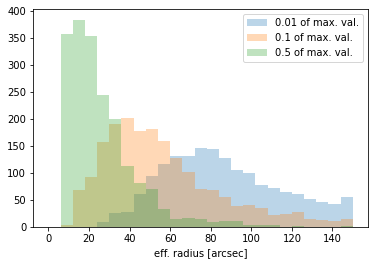

In [47]:
bins=np.r_[:151:6]
pl.hist(radii,bins,alpha=0.3)
pl.hist(radii10,bins,alpha=0.3);
pl.hist(radii2,bins,alpha=0.3);
#pl.xlim(0,300)
pl.xlabel('eff. radius [arcsec]')
pl.legend([a+" of max. val." for a in ['0.01','0.1','0.5']])

Text(0.5, 0, 'eff. radius [arcsec]')

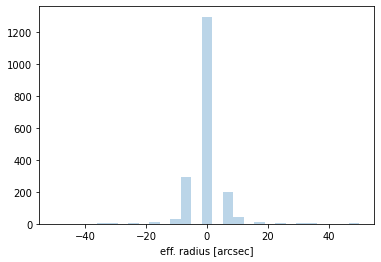

In [71]:
pl.hist(radii2c-radii2f,np.r_[-50:50:30j],alpha=0.3);
#pl.hist(radii2f,bins,alpha=0.3);
#pl.xlim(0,300)
pl.xlabel('eff. radius [arcsec]')

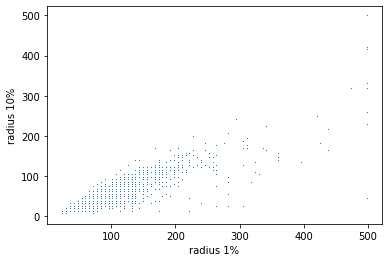

In [48]:
pl.plot(radii,radii10,',')
pl.xlabel("radius 1%")
pl.ylabel("radius 10%");


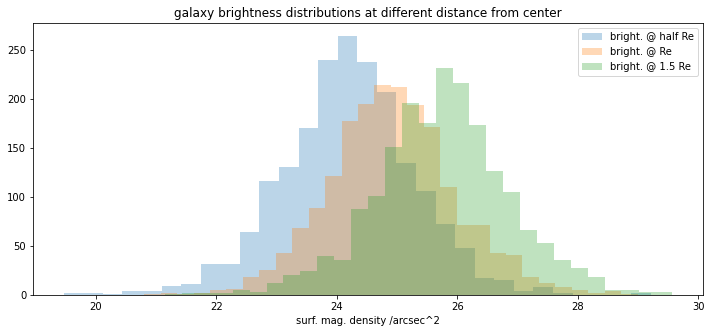

In [83]:
fig=pl.figure(figsize=(12,5))
radiix=radii2c

step=6
d05=(radiix/step/2).astype(int) #half radius
mag05=data[d05+begline[:-1],6]
pl.hist(mag05[mag05<90],30,alpha=0.3);

d10=(radiix/step).astype(int)
mag10=data[d10+begline[:-1],6]
pl.hist(mag10[mag10<90],30,alpha=0.3);

d15=(radiix/step*1.5).astype(int) #half radius
largsel=(begline[1:]-begline[:-1]>d15)
mag15=data[d15+begline[:-1],6][largsel]
pl.hist(mag15[mag15<90],30,alpha=0.3);

pl.title('galaxy brightness distributions at different distance from center')
pl.xlabel('surf. mag. density /arcsec^2')
pl.legend(['bright. @ half Re','bright. @ Re','bright. @ 1.5 Re'])
pl.savefig("gal_bright_dist_re.png",dpi=150)

In [84]:
sum(mag10<90)

1930

In [76]:
mag10[mag10<90].mean(),mag10[mag10<90].std()

(24.920282901554405, 1.0623751675611814)

In [77]:
mag15[mag15<90].mean(),mag15[mag15<90].std()

(25.74422972972973, 1.113297820738387)

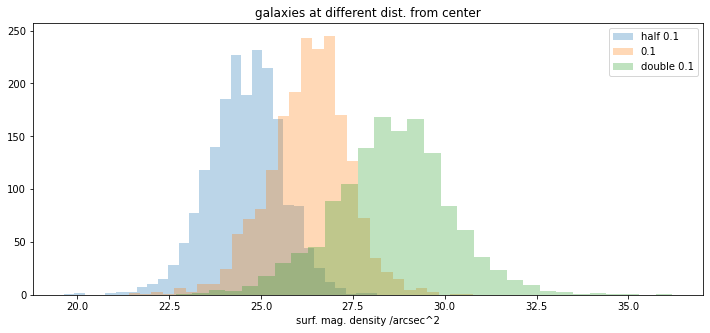

In [94]:
fig=pl.figure(figsize=(12,5))
step=6
d05=(radii10/step/2).astype(int) #half radius
mag05=data[d05+begline[:-1],6]
pl.hist(mag05[mag05<90],30,alpha=0.3);

d10=(radii10/step).astype(int)
mag10=data[d10+begline[:-1],6]
pl.hist(mag10[mag10<90],30,alpha=0.3);

d20=(radii10/step*2).astype(int) #half radius
largsel=(begline[1:]-begline[:-1]>d20)
mag20=data[d20+begline[:-1],6][largsel]
pl.hist(mag20[mag20<90],30,alpha=0.3);

pl.title('galaxies at different dist. from center')
pl.xlabel('surf. mag. density /arcsec^2')
pl.legend(['half 0.1','0.1','double 0.1'])

In [ ]:
for i in range(len(begline)-1):
    mag,emag=data[begline[i]:begline[i+1],6:8].T

In [30]:
len(sources),len(begline)

(1931, 1931)

Text(0.5, 0, 'distance [Mpc]')

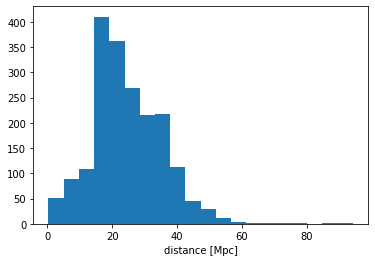

In [92]:
pl.hist(sources[:,3],20)
pl.xlabel('distance [Mpc]')

http://leda.univ-lyon1.fr/a102/

Text(0.5, 1.0, 'classification')

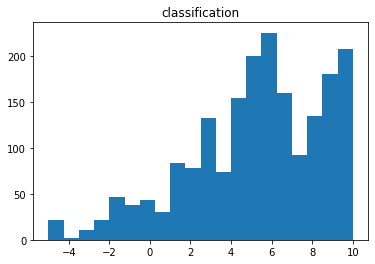

In [93]:
pl.hist(sources[:,2],20)
pl.title("morph. classification")

In [98]:
oldtype=(sources[:-1,2]<=0)
sum(oldtype)

174

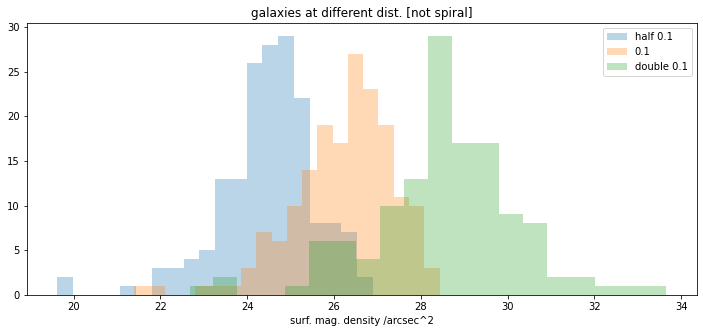

In [99]:
fig=pl.figure(figsize=(12,5))
step=6
d05=(radii10/step/2).astype(int) #half radius
mag05=data[d05+begline[:-1],6][oldtype]
pl.hist(mag05[mag05<90],20,alpha=0.3);

d10=(radii10/step).astype(int)
mag10=data[d10+begline[:-1],6][oldtype]
pl.hist(mag10[mag10<90],20,alpha=0.3);

d20=(radii10/step*2).astype(int) #half radius
largsel=(begline[1:]-begline[:-1]>d20)[oldtype]
mag20=data[d20+begline[:-1],6][oldtype][largsel]
pl.hist(mag20[mag20<90],20,alpha=0.3);

pl.title('galaxies at different dist. [not spiral]')
pl.xlabel('surf. mag. density /arcsec^2')
pl.legend(['half 0.1','0.1','double 0.1'])

In [105]:
from collections import Counter
cts=Counter(sources[:-1,2].astype(int))
ckeys=list(cts.keys())
ckeys=np.sort(ckeys)
[(c,cts[c]) for c in ckeys]

[(-5, 1),
 (-4, 21),
 (-3, 5),
 (-2, 49),
 (-1, 42),
 (0, 95),
 (1, 95),
 (2, 80),
 (3, 192),
 (4, 178),
 (5, 322),
 (6, 237),
 (7, 160),
 (8, 188),
 (9, 246),
 (10, 19)]